# 多层感知机的简洁实现
`sec_mlp_concise`

本节将介绍(**通过高级API更简洁地实现多层感知机**)。


In [1]:
import torch
from torch import nn
# from d2l import torch as d2l

import sys
sys.path.append("..")
import d2lzh_pytorch.torch_package as d2l

print(torch.__version__)

/home/mylady/anaconda3/envs/d2l_pytorch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/mylady/anaconda3/envs/d2l_pytorch/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/mylady/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mylady/anaconda3/envs/d2l_pytorch/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils

2.2.2+cu121


## 模型

与softmax回归的简洁实现（ `sec_softmax_concise`）相比，
唯一的区别是我们添加了2个全连接层（之前我们只添加了1个全连接层）。
第一层是[**隐藏层**]，它(**包含256个隐藏单元，并使用了ReLU激活函数**)。
第二层是输出层。


In [2]:

# 模型构建
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    #nn.Linear(256, 128),
                    nn.ReLU(),
                    nn.Linear(256, 10)
                   )

In [3]:

# 模型初始化
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

        
net.apply(init_weights);

In [4]:
net.state_dict()

OrderedDict([('1.weight',
              tensor([[ 0.0033, -0.0035, -0.0073,  ...,  0.0051, -0.0049,  0.0082],
                      [ 0.0076, -0.0226, -0.0112,  ..., -0.0091,  0.0173,  0.0046],
                      [ 0.0056, -0.0036,  0.0061,  ..., -0.0019, -0.0069,  0.0071],
                      ...,
                      [-0.0033, -0.0015,  0.0086,  ..., -0.0073,  0.0006,  0.0002],
                      [ 0.0051, -0.0084,  0.0047,  ..., -0.0051, -0.0004, -0.0083],
                      [-0.0089, -0.0002,  0.0023,  ...,  0.0106, -0.0047,  0.0009]])),
             ('1.bias',
              tensor([-1.0599e-02,  3.2729e-02,  2.2183e-02, -8.8602e-05,  3.4601e-02,
                       3.0437e-02,  2.1113e-02,  2.3200e-02, -1.4043e-02,  4.1867e-03,
                       3.0649e-02,  1.0628e-02,  1.7175e-02, -1.2435e-02,  1.4848e-02,
                       2.7409e-02, -2.7263e-02, -3.4250e-02,  1.2267e-02,  1.1972e-03,
                      -1.4760e-02, -1.0387e-02,  3.1601e-02, -3.1151

[**训练过程**]的实现与我们实现softmax回归时完全相同，
这种模块化设计使我们能够将与模型架构有关的内容独立出来。


In [5]:
batch_size= 256
lr = 0.1
num_epochs = 10


loss = nn.CrossEntropyLoss(reduction='none')

trainer = torch.optim.SGD(net.parameters(), lr=lr)

In [6]:

# 加载训练数据
rootPath = r"/home/mylady/ai_data/d2l_data/FashionMNIST"

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, root=rootPath)

train_loss: 0.3814, train_acc: 0.8643
time final_time:  12.3108


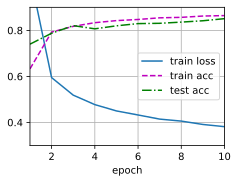

In [7]:

# 训练
d2l.train_ch3(net, 
              train_iter, 
              test_iter, 
              loss, 
              num_epochs, 
              trainer)